# Moments

The distribution of a random variable is often characterized not only in terms of the mean $\mu_X = E[X]$, but also in terms of other types of expected values called *moments*. The two types of moments we will consider are defined below.

````{card}
DEFINITION
^^^
```{glossary}
$n$th moment
    The $n$th moment of a random variable $X$ is $E[X^n]$ for $n=1,2,\ldots$.
```
````
Note that the mean is the first moment.



Let's consider the moment $E[X^2]$. The first thing you should understand is that we are asking the expected value of a function of a random variable.  A function of a random variable is also a random variable. Let $Y=X^2$.  Then clearly $Y$ is non-negative, even if $X$ has non-zero density for negative values. Determining the density of $Y$ is beyond the scope of this text, but I do want to give you a feel for that. So let's make a normal random variable with mean 4 using Scipy.stats, draw 1,000 random values and then plot the histogram of the values and the histogram of the squares of the values:

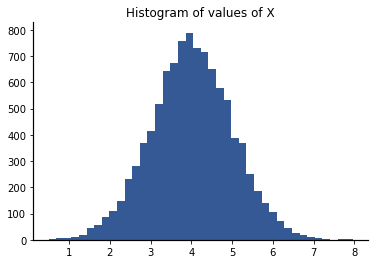

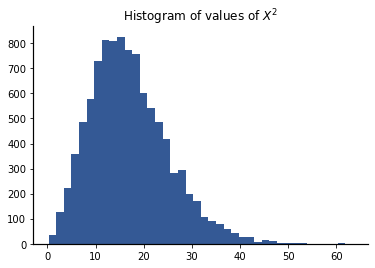

In [27]:
import scipy.stats as stats
import matplotlib.pyplot as plt

X=stats.norm(loc=4)
Xvals = X.rvs(10_000)
plt.hist(Xvals, 40)
plt.title('Histogram of values of X')
plt.figure()
plt.title('Histogram of values of $X^2$')
plt.hist(Xvals**2,40);

We can use the average of the data to estimate the expected values. Thus, the expected value of $X$ is approximately

In [28]:
Xvals.mean() 

4.010151583168886

We get an average which is very close to the true mean of 4. 

Now, let's estimate $E[X^2]$ by the average of the `Xvals ** 2`:

In [29]:
(Xvals ** 2).mean()

17.070232935696655

The average is approximately 17. Note that $E[X^2] \ne (E[X])^2$.

This seems like bad news because
1. we can't get $E[X^2]$ from $E[X]$, and
2. we don't know how to get the distribution of $Y=X^2$ from the distribution of $X$.

Fortunately, we can calculate moments without having to find the distribution of the random variable raised to some power using the LOTUS rule:

````{card}
DEFINITION
^^^
```{glossary}
Law of the Unconscious Statistician (LOTUS)
    Let $g(x)$ be a real function. If $X$ is a discrete random variable, then 
    \begin{equation*} E\left[ g(X) \right] = \sum_x g(x) p_X(x).\end{equation*}
    If $X$ is a continuous random variable, then 
    \begin{equation*} E\left[ g(X) \right] = \int_{-\infty}^{\infty} g(x) f_X(x)~dx.\end{equation*} 
```
````

It is called the "Law of the Unconscious Statistician" because it is what you might try if you didn't realize that $f(X)$ is itself a random variable with its own distribution that is different than that of $X$, and yet it can be proven to be correct.

Let's see what this means for our example of $E[X^2]$. We are evaluating $E[f(X)]$ for the function $g(x) = x^2$. Thus, by the LOTUS rule

\begin{align*}
E[X^2] &= \int_{-\infty} ^{\infty} g(x) f_X(x)~dx \\
&= \int_{-\infty} ^{\infty} x^2 f_X(x)~dx . \\
\end{align*}

##  Interpretation of Moments
You might be wondering the purpose of defining different moments. Let's try to get some insight by looking at the equation to calculate the $n$th moment for a continuous random variable,
\begin{equation*}
E[X^n] = \int_{-\infty}^{\infty} x^n f_X(x) ~ dx.
\end{equation*}

The $n$th moment is the integral of the product of two functions. Let's plot these two functions along with their product for two Normal density functions -- don't worry about the parameters I chose for the distributions, focus on building intuition through the plots.

We start with the 1st moment (the mean),
\begin{equation*}
E[X] = \int_{-\infty}^{\infty} x f_X(x) ~ dx.
\end{equation*}

We will use the following interpretation. For this integral, each probability density value $f_X(x)$ is weighted by the position $x$ of that density value.  I have plotted the density and the linear weighting function on the left-hand side of the graphs below, and we plot their product on the right-hand side of the graphs.

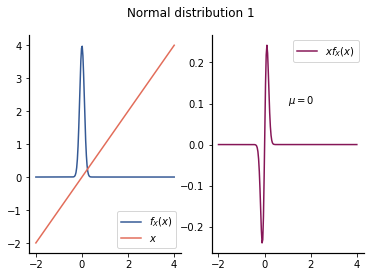

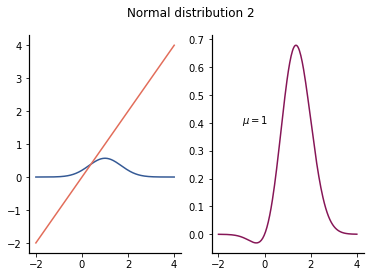

In [203]:
import matplotlib.pyplot as plt
import scipy.stats as stats

X1=stats.norm(0,0.1)
x1=np.linspace(-2,4,201)

fig, ax = plt.subplots(1, 2)
fig.suptitle('Normal distribution 1')

ax[0].plot(x1, X1.pdf(x1), label='$f_X(x)$')
ax[0].plot(x1, x1, label='$x$')
ax[0].legend()
ax[1].plot(x1, x1*X1.pdf(x1), color='C4', label='$x f_X(x)$' )
ax[1].text(1, 0.1, '$\mu = 0$')
ax[1].legend()

fig2, ax2 = plt.subplots(1, 2)
fig2.suptitle('Normal distribution 2')

X2=stats.norm(1, 0.7)
x2=x1


ax2[0].plot(x2, X2.pdf(x2))
ax2[0].plot(x2, x2)
ax2[1].plot(x2, x2*X2.pdf(x2), color='C4' );
ax2[1].text(-1, 0.4, '$\mu = 1$');





The first density is symmetric around 0, and the weighting function applies equal positive and negative components. The resulting mean is  0 -- since $x f_X(x)$ is an odd symmetric function around 0, the integral is 0.

The second density is symmetric around 1 and has more spread away from 1. The product of the density function and the weighting function may at first glance seem symmetric, but further inspection should reveal that it is not. However, the mean is still 1.  The parameter $\mu$ of the Normal distribution that we have been calling the mean is in fact always the mean of that distribution:


\begin{align*}
E[X] = \int_{-\infty}^{\infty} x \cdot \frac{1}{\sigma \sqrt{2 \pi}}
\exp \left ( -\frac 1 2 \left[ \frac{x-\mu}{\sigma} \right]^2 \right)
\end{align*}

Now we add and subtract a term,
\begin{align*}
E[X] = &\int_{-\infty}^{\infty} (x- \mu) \cdot \frac{1}{\sigma \sqrt{2 \pi}}
\exp \left ( -\frac 1 2 \left[ \frac{x-\mu}{\sigma} \right]^2 \right)\\
&+ \int_{-\infty}^{\infty} \mu \cdot \frac{1}{\sigma \sqrt{2 \pi}}
\exp \left ( -\frac 1 2 \left[ \frac{x-\mu}{\sigma} \right]^2 \right)
\end{align*}

The first integral is 0 because of odd symmetry around $\mu$. This may be confusing to some who are used to only odd symmetry around 0, so let's do the change of variable $u = x-\mu$. With this change of variable, the region of integration is still $(-\infty, \infty)$:
\begin{align*}
E[X] =& \int_{-\infty}^{\infty} u \cdot \frac{1}{\sigma \sqrt{2 \pi}}
\exp \left ( -\frac 1 2 \left[ \frac{u}{\sigma} \right]^2 \right)\\
&+ \mu  \int_{-\infty}^{\infty} \cdot \frac{1}{\sigma \sqrt{2 \pi}}
\exp \left ( -\frac 1 2 \left[ \frac{x-\mu}{\sigma} \right]^2 \right).
\end{align*}
In addition to the change of variable, I pulled the constant term $\mu$ outside the second integral.

Then the first integral is 0 because of odd symmetry around 0. The second integral is 1 because it is the integral of the Normal density  function. So, $E[X] = \mu$.

Now consider the 2nd moment,
\begin{equation*}
E[X^2] = \int_{-\infty}^{\infty} x^2 f_X(x)~dx.
\end{equation*}
The weight function is now a quadratic that is always positive and increases with the square of the distance from the point $x=0$. The 2nd moment will be large when the probability mass is distant from the origin. Let's see how this looks for our example distributions:

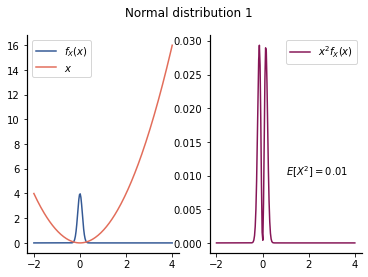

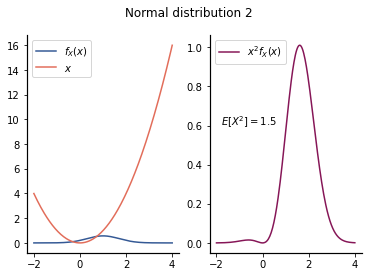

In [173]:

X1=stats.norm(0,0.1)
x1=np.linspace(-2,4,201)

fig3, ax3 = plt.subplots(1, 2)
fig3.suptitle('Normal distribution 1')

ax3[0].plot(x1, X1.pdf(x1), label='$f_X(x)$')
ax3[0].plot(x1, x1**2, label='$x$')
ax3[0].legend()
ax3[1].plot(x1, x1**2*X1.pdf(x1), color='C4', label='$x^2 f_X(x)$' )
ax3[1].text(1, 0.01, f'$E[X^2] = {X1.moment(2):.2g}$')
ax3[1].legend()

fig4, ax4 = plt.subplots(1, 2)
fig4.suptitle('Normal distribution 2')

X2=stats.norm(1, 0.7)
x2=x1


ax4[0].plot(x2, X2.pdf(x2),  label='$f_X(x)$')
ax4[0].plot(x2, x2**2, label='$x$')
ax4[1].plot(x2, x2**2*X2.pdf(x2), color='C4', label='$x^2 f_X(x)$');
ax4[0].legend()
ax4[1].legend()

ax4[1].text(-1.8, 0.6, f'$E[X^2] = {X2.moment(2):.2g}$');

Note the extreme difference in the values of the second moment for these distributions. The second distribution has most of its probability density away from $x=0$, whereas the first distribution has its probability density highly concentrated around 0. 

If we have different distributions that are centered at 0, then the second moment measures the spread of the distribution:

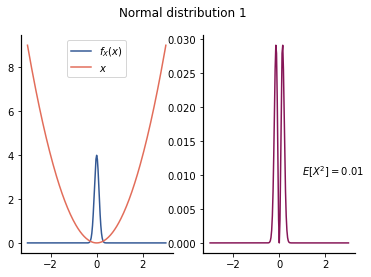

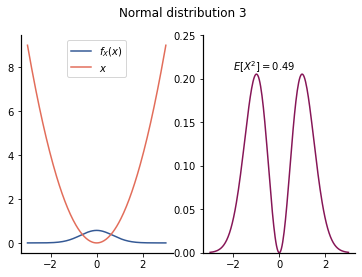

In [184]:

X1=stats.norm(0,0.1)
x1=np.linspace(-3, 3,201)

fig3, ax3 = plt.subplots(1, 2)
fig3.suptitle('Normal distribution 1')

ax3[0].plot(x1, X1.pdf(x1), label='$f_X(x)$')
ax3[0].plot(x1, x1**2, label='$x$')
ax3[0].legend()
ax3[1].plot(x1, x1**2*X1.pdf(x1), color='C4', label='$x^2 f_X(x)$' )
ax3[1].text(1, 0.01, f'$E[X^2] = {X1.moment(2):.2g}$')
#ax3[1].legend()

fig4, ax4 = plt.subplots(1, 2)
fig4.suptitle('Normal distribution 3')

X3=stats.norm(0, 0.7)
x3=x1


ax4[0].plot(x3, X3.pdf(x3), label='$f_X(x)$')
ax4[0].plot(x3, x3**2, label='$x$')
ax4[1].plot(x3, x3**2*X3.pdf(x3), color='C4', label='$x^2 f_X(x)$' );
ax4[1].text(-2, 0.21, f'$E[X^2] = {X3.moment(2):.2g}$');
ax4[0].legend()
#ax4[1].legend()
ax4[1].set_ylim(0, 0.25);

However, if the mean is non-zero, then the 2nd moment will also depend on the mean. If we want to measure the spread around the mean, we should subtract of the mean from the random variable before taking the 2nd moment. This creates a *central moment*:

## Central Moments

````{card}
DEFINITION
^^^
```{glossary}
$n$th central moment
    Let $X$ be a random variable with mean $\mu_X$. Then the $n$th *central moment* of $X$ is $E[(X-\mu_X)^n]$ for $n=2,3,\ldots$.
```
````




The most comment moment after the mean is the variance:


````{card}
DEFINITION
^^^
```{glossary}
variance, random variable
    Let $X$ be a random variable with mean $\mu_X$. **The variance is the 2nd central moment** and is denoted by $\operatorname{Var}(X)$ or $\sigma_{X}^{2}$. I.e., $\sigma_{X}^{2} = E \left[ \left( X - \mu_X \right)^2 \right]$.
```
````

The variance of a random variable may be infinite, even if the mean is finite. 

We can interpret central moments using a similar visualization as we did for non-central moments. For example, the formula for the variance of a continuous random variable is 
\begin{equation*}
\operatorname{Var}(X) = \int_{-\infty}^{\infty} \left( x - \mu \right)^2 f_X(x) ~ dx.
\end{equation*}

The example below shows the density and weighting factors for two Normal distributions with the same variance but different means:

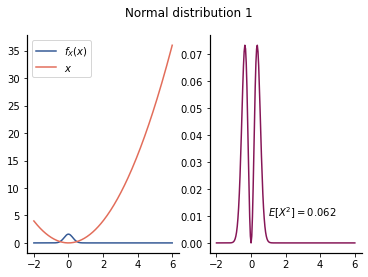

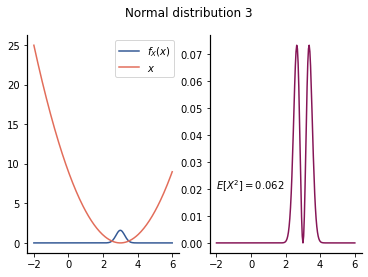

In [200]:

X1=stats.norm(0, 0.25)
x1=np.linspace(-2, 6,201)

fig3, ax3 = plt.subplots(1, 2)
fig3.suptitle('Normal distribution 1')

ax3[0].plot(x1, X1.pdf(x1), label='$f_X(x)$')
ax3[0].plot(x1, x1**2, label='$x$')
ax3[0].legend()
ax3[1].plot(x1, x1**2*X1.pdf(x1), color='C4', label='$x^2 f_X(x)$' )
ax3[1].text(1, 0.01, f'$E[X^2] = {X1.var():.2g}$')
#ax3[1].legend()

fig4, ax4 = plt.subplots(1, 2)
fig4.suptitle('Normal distribution 3')

X3=stats.norm(3, 0.25)
x3=x1


ax4[0].plot(x3, X3.pdf(x3), label='$f_X(x)$')
ax4[0].plot(x3, (x3-3)**2, label='$x$')
ax4[1].plot(x3, (x3-3)**2*X3.pdf(x3), color='C4', label='$x^2 f_X(x)$' );
ax4[1].text(-2, 0.02, f'$E[X^2] = {X3.var():.2g}$');
ax4[0].legend()
#ax4[1].legend()
#ax4[1].set_ylim(0, 0.25);

Because the quadratic weighting function is shifted to align with the mean of the distribution, the product of the two functions is even around the mean. The variance of the Normal random variable is slightly more challenging to derive than the mean, so the derivation is omitted. For a normal with parameter $\sigma$, the variance is $\sigma^2$. The value $\sigma$ is called the standard deviation:


````{card}
DEFINITION
^^^
```{glossary}
standard deviation, random variable
    Let $X$ be a random variable with finite variance $\sigma_{X}^{2} = E[(X-\mu_X)^2]$. Then the *standard deviation* of $X$ is denoted by $\sigma_X$ and can be computed as 
    \begin{equation*}
    \sigma_X = \sqrt{ E \left[ \left(X - \mu_X \right)^2 \right]}  .
    \end{equation*}
```
````




### More on interpretation of variance

For a given value $x$,  $(x-\mu_x)^2$ is the distance squared of  $x$ from the mean of the random variable $X$. If instead of a particular $x$, we have random variable $X$, then $(X-\mu_X)^2$ is a random distance squared. Thus, $\sigma_{X}^{2} = E[(X-\mu_X)^2$ is the expected distance of the random variable from its mean. The higher probability that the random variable takes values far from its mean, the higher the value of $\sigma_{X}^{2}$.

Let's illustrate this for the Normal random variable. Recall that a Normal random variable is specified by two values:
* $\mu$, the mean, and
* $\sigma$, the standard deviation (or, equivalently, $sigma_{X}^{2}, the variance).

In SciPy, the mean of a Normal distribution can be set using the `loc` keyword parameter. Below is a plot of three different Normal distributions with $\sigma=1$ and means -4, 0, and 3.


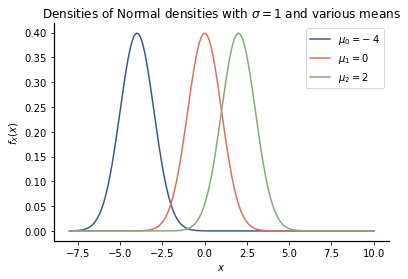

In [55]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

X0 = stats.norm(loc = -4)
X1 = stats.norm(loc = 0)
X2 = stats.norm(loc = 2)

x=np.linspace(-8,10, 151)

plt.plot(x, X0.pdf(x), 
         label = '$\mu_0 =\! -4$' )
plt.plot(x, X1.pdf(x), 
         label = '$\mu_1 = 0$' )
plt.plot(x, X2.pdf(x), 
         label = '$\mu_2 = 2$' )

plt.title('Densities of Normal densities with $\sigma=1$' +
          ' and various means')
plt.xlabel('$x$')
plt.ylabel('$f_X(x)$')
plt.legend();


Changing the mean does not change the spread of the pdf -- it only changes the position of the density. 

Now let's look at the effect of the variance on the shapes of the pdfs. To keep the pdfs separated, we will still use the means from above and change the standard deviations to 3, 1, and 1/2. The standard deviation of a Normal distribution in SciPy.stats can be set using the `scale` keyword parameter.

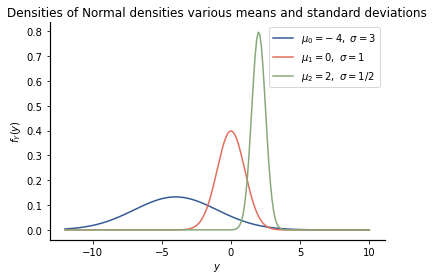

In [62]:
Y0 = stats.norm(loc = -4, scale =3 )
Y1 = stats.norm(loc = 0, scale = 1)
Y2 = stats.norm(loc = 2, scale = 1/2)

y=np.linspace(-12,10, 201)

plt.plot(y, Y0.pdf(y), 
         label = '$\mu_0 =\! -4,~\sigma=3$' )
plt.plot(y, Y1.pdf(y), 
         label = '$\mu_1 = 0,~\sigma=1 $' )
plt.plot(y, Y2.pdf(y), 
         label = '$\mu_2 = 2,~\sigma=1/2$' )

plt.title('Densities of Normal densities various means' +
         ' and standard deviations') 
plt.xlabel('$y$')
plt.ylabel('$f_Y(y)$')
plt.legend();

Larger standard deviations (and hence larger variances) cause the pdf to spread out more, in which case the magnitude of the pdf must be smaller, since the integral of the pdf must be 1.  

## Example Using SymPy

**Example: Find the mean and variance of an exponential random variable.**

Recall that the density of the exponential random variable is 

$$
f_X(x) = 
\begin{cases}
0, & x < 0 \\
\lambda e^{-\lambda x}, & x \ge 0
\end{cases}.
$$

Remember that `lambda` is a keyword, so we will use 'L' in place of `lambda` Let's import SymPy and set up our variables and density function:

In [20]:
import sympy as sp
x, L = sp.symbols("x,L")
fX = L * sp.exp(- L * x)

```{warning}

Note that we had to use SymPy's `sp.exp()` function, not NumPy's `np.exp()` function so that SymPy will know how to integrate it. This also demonstrates the importance of importing libraries into their own namespaces because otherwise, we have a potential confusion between these two functions.
```

We can first check that our pdf integrates to 1. To do that, we will need to learn that to  express $\infty$ in SymPy, we can use `sp.oo` (because `oo` looks like $\infty$).

In [25]:
sp.integrate(fX, (x, 0, sp.oo) )

Piecewise((1, Abs(arg(L)) < pi/2), (Integral(L*exp(-L*x), (x, 0, oo)), True))

We see that `sp.integrate()` can actually handle complex integration, but we only have real integration, so the first result applies. The integral of the pdf is 1.

Now let's compute the mean:

In [26]:
sp.integrate(x*fX, (x, 0, sp.oo) )

Piecewise((1/L, Abs(arg(L)) < pi/2), (Integral(L*x*exp(-L*x), (x, 0, oo)), True))

The mean is $1/\lambda$. Many engineers have this integral memorized; otherwise you may need to look it up in a table or perform integration by parts if you don't use SymPy. 

Let's calculate the variance:

In [33]:
muX = 1/L
sp.integrate( (x- muX)**2 * fX, (x, 0, sp.oo) )

Piecewise((L**(-2), Abs(arg(L)) < pi/2), (Integral(L*(x - 1/L)**2*exp(-L*x), (x, 0, oo)), True))

The variance of the exponential random variable is $\sigma_{X}^{2} = 1/\lambda^2$.

Note that we often compute the variance using a simpler formula. Consider the definition of the variance and expand the quadratic term:

$$
E\left[ \left( X - \mu_X \right)^2 \right] =
E\left[  X^2 - 2 \mu_X X + \mu_{X}^{2} \right] .
$$

Note that $\mu_X$ is some constant. Thus, we have a linear combination of terms, and expected value is a linear operator. We can thus rewrite this expression as 
$$
E\left[ \left( X - \mu_X \right)^2 \right] =
E\left[  X^2\right] - 2 \mu_X E \left[X\right]  + \mu_{X}^{2} .
$$

In the second term, $E[X] = \mu_X$. Then combining the second and third terms yields
$$
E\left[ \left( X - \mu_X \right)^2 \right] =
E\left[  X^2\right] -  \mu_{X}^{2} .
$$

Let's test this for the exponential random variable. If we find the 2nd moment, we get

In [34]:
sp.integrate( x**2 * fX, (x, 0, sp.oo) )

Piecewise((2/L**2, Abs(arg(L)) < pi/2), (Integral(L*x**2*exp(-L*x), (x, 0, oo)), True))

The result is $E[X^2] = 2/\lambda^2$.  Then the variance is 

$$
\sigma_{X}^{2} = E[X^2] - \mu_{X}^{2} = \frac{2}{\lambda^2} - \left(\frac 1 \lambda\right) ^2 = \frac{1}{\lambda^2},
$$
which agrees with our previous result.

## Properties Variance

Variance has several important properties that we will be using later in this class. To see these, let $X$ be a random variable and $b$ and $c$ constant values. Then the following hold:


1. The variance of a constant is 0, $\operatorname{Var}[c] = 0$. This is because the mean of a constant is that constant, so 
\begin{equation*}
E[(c- E[c])^2 = E[(c-c)^2]=0.
\end{equation*}

3. Adding a constant to a  random variable does not change its variance. This is because adding a constant shifts the mean by that constant: $E[X+c] = \mu_X +c$, so 
\begin{align*}
\operatorname{Var}[X+c] &= E \left[ \left( \left\{X+c\right\} - E\left\{X+c\right\} \right)^2 \right] \\
 &= E \left[ \left( X+c - \mu_X - c\right)^2 \right] \\
  &= E \left[ \left( X -\mu_X \right)^2 \right] \\
  &= \operatorname{Var}[X]\\
\end{align*}

4. Multiplying by a constant scales the variance by the **square** of that constant, $\operatorname{Var}[cX] = c^2 \operatorname{Var}[X]$. The proof uses a similar algebraic approach as for adding a constant and is omitted.